In [1]:
import pandas as pd
from pathlib import Path
import numpy as np

import os

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 100

DPI=300
FONTSIZE=20 #42

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42

In [2]:
clinical_data = pd.read_csv("/data/BCI-CRC/SO/data/public/TCGA/COADREAD_clinical.csv")

In [3]:
clinical_data

,project,submitter_id,synchronous_malignancy,ajcc_pathologic_stage,days_to_diagnosis,created_datetime,last_known_disease_status,tissue_or_organ_of_origin,days_to_last_follow_up,age_at_diagnosis,primary_diagnosis,updated_datetime,prior_malignancy,year_of_diagnosis,state,prior_treatment,days_to_last_known_disease_status,ajcc_staging_system_edition,ajcc_pathologic_t,days_to_recurrence,morphology,ajcc_pathologic_n,ajcc_pathologic_m,classification_of_tumor,diagnosis_id,icd_10_code,site_of_resection_or_biopsy,tumor_grade,progression_or_recurrence,NA.,cigarettes_per_day,alcohol_history,exposure_id,years_smoked,alcohol_intensity,race,gender,ethnicity,vital_status,age_at_index,days_to_birth,year_of_birth,demographic_id,year_of_death,days_to_death,treatments_pharmaceutical_days_to_treatment_end,treatments_pharmaceutical_days_to_treatment_start,treatments_pharmaceutical_treatment_id,treatments_pharmaceutical_treatment_type,treatments_pharmaceutical_regimen_or_line_of_therapy,treatments_pharmaceutical_treatment_effect,treatments_pharmaceutical_therapeutic_agents,treatments_pharmaceutical_treatment_or_therapy,treatments_pharmaceutical_initial_disease_status,treatments_pharmaceutical_treatment_intent_type,treatments_pharmaceutical_treatment_anatomic_site,treatments_pharmaceutical_treatment_outcome,treatments_radiation_days_to_treatment_end,treatments_radiation_days_to_treatment_start,treatments_radiation_treatment_id,treatments_radiation_treatment_type,treatments_radiation_regimen_or_line_of_therapy,treatments_radiation_treatment_effect,treatments_radiation_therapeutic_agents,treatments_radiation_treatment_or_therapy,treatments_radiation_initial_disease_status,treatments_radiation_treatment_intent_type,treatments_radiation_treatment_anatomic_site,treatments_radiation_treatment_outcome,bcr_patient_barcode
0,TCGA-COAD,TCGA-AA-3976,Not Reported,Stage IIIA,0.0,NaN,not reported,Rectosigmoid junction,791.0,25599.0,"Adenocarcinoma, NOS",2019-08-08T16:35:04.140343-05:00,yes,2009.0,released,No,NaN,6th,T2,NaN,8140/3,N1,M0,not reported,2fb760ba-3fe5-579b-8be8-86ecfb0a0d23,C19,Rectosigmoid junction,not reported,not reported,NaN,NaN,Not Reported,133e0568-20df-516f-a838-2b0cd4625854,NaN,NaN,not reported,male,not reported,Alive,70.0,-25599.0,1939.0,96d26f8d-129f-5e5a-a45f-8c3b37b9665c,NaN,NaN,NaN,NaN,4cb389fd-e3a6-503e-a04e-0548088178c9,"Pharmaceutical Therapy, NOS",NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,980fcca3-9a0c-5295-b2bd-fcc8a31f7355,"Radiation Therapy, NOS",NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-AA-3976
1,TCGA-COAD,TCGA-G4-6307,No,Stage IIIB,0.0,NaN,not reported,Sigmoid colon,1674.0,13648.0,"Adenocarcinoma, NOS",2019-08-08T16:37:18.448891-05:00,no,2007.0,released,No,NaN,2nd,T3,NaN,8140/3,N1,M0,not reported,956357f2-9c5f-5c6d-9371-5b6c7a0198d2,C18.7,Sigmoid colon,not reported,not reported,NaN,NaN,Not Reported,f6ce3857-214a-5e22-a3ea-067a1aa4db04,NaN,NaN,white,female,not hispanic or latino,Alive,37.0,-13648.0,1970.0,77af3a77-5a0c-5b9e-ba16-590cba3d54b2,NaN,NaN,NaN,NaN,8420a802-696e-5e21-954c-d38f287c2e6e,"Pharmaceutical Therapy, NOS",NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,0d639c64-bb66-5ef3-96b1-29afb95b258f,"Radiation Therapy, NOS",NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-G4-6307
2,TCGA-COAD,TCGA-AA-3522,Not Reported,Stage IIA,0.0,NaN,not reported,Ascending colon,1127.0,24653.0,"Adenocarcinoma, NOS",2019-08-08T16:34:13.342472-05:00,yes,2007.0,released,No,NaN,6th,T3,NaN,8140/3,N0,M0,not reported,d18fc9ab-3aef-57ac-97d8-3db794c2fc10,C18.2,Ascending colon,not reported,not reported,NaN,NaN,Not Reported,689e4e8a-4578-5e69-a2fb-039a55a620e1,NaN,NaN,not reported,male,not reported,Alive,67.0,-24653.0,1940.0,2f67d8f1-1e33-5af7-b756-333371f796eb,NaN,NaN,NaN,NaN,3598dd59-cccb-53ca-9074-cfb788673192,"Pharmaceutical Therapy, NOS",NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,2c99bb28-6a7e-5f5f-acaa-32edbd6ddb39,"Radiation Therapy, NOS",NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-AA-3522
3,TCGA-COAD,TCGA-AA-3530,Not Reported,Stage I,0.0,NaN,not reported,"Colon, NOS",580.0,29402.0,"A

In [4]:
# remove patients for which stage not available
clinical_data.dropna(axis=0, subset='ajcc_pathologic_stage', inplace=True)

In [5]:
clinical_data

,project,submitter_id,synchronous_malignancy,ajcc_pathologic_stage,days_to_diagnosis,created_datetime,last_known_disease_status,tissue_or_organ_of_origin,days_to_last_follow_up,age_at_diagnosis,primary_diagnosis,updated_datetime,prior_malignancy,year_of_diagnosis,state,prior_treatment,days_to_last_known_disease_status,ajcc_staging_system_edition,ajcc_pathologic_t,days_to_recurrence,morphology,ajcc_pathologic_n,ajcc_pathologic_m,classification_of_tumor,diagnosis_id,icd_10_code,site_of_resection_or_biopsy,tumor_grade,progression_or_recurrence,NA.,cigarettes_per_day,alcohol_history,exposure_id,years_smoked,alcohol_intensity,race,gender,ethnicity,vital_status,age_at_index,days_to_birth,year_of_birth,demographic_id,year_of_death,days_to_death,treatments_pharmaceutical_days_to_treatment_end,treatments_pharmaceutical_days_to_treatment_start,treatments_pharmaceutical_treatment_id,treatments_pharmaceutical_treatment_type,treatments_pharmaceutical_regimen_or_line_of_therapy,treatments_pharmaceutical_treatment_effect,treatments_pharmaceutical_therapeutic_agents,treatments_pharmaceutical_treatment_or_therapy,treatments_pharmaceutical_initial_disease_status,treatments_pharmaceutical_treatment_intent_type,treatments_pharmaceutical_treatment_anatomic_site,treatments_pharmaceutical_treatment_outcome,treatments_radiation_days_to_treatment_end,treatments_radiation_days_to_treatment_start,treatments_radiation_treatment_id,treatments_radiation_treatment_type,treatments_radiation_regimen_or_line_of_therapy,treatments_radiation_treatment_effect,treatments_radiation_therapeutic_agents,treatments_radiation_treatment_or_therapy,treatments_radiation_initial_disease_status,treatments_radiation_treatment_intent_type,treatments_radiation_treatment_anatomic_site,treatments_radiation_treatment_outcome,bcr_patient_barcode
0,TCGA-COAD,TCGA-AA-3976,Not Reported,Stage IIIA,0.0,NaN,not reported,Rectosigmoid junction,791.0,25599.0,"Adenocarcinoma, NOS",2019-08-08T16:35:04.140343-05:00,yes,2009.0,released,No,NaN,6th,T2,NaN,8140/3,N1,M0,not reported,2fb760ba-3fe5-579b-8be8-86ecfb0a0d23,C19,Rectosigmoid junction,not reported,not reported,NaN,NaN,Not Reported,133e0568-20df-516f-a838-2b0cd4625854,NaN,NaN,not reported,male,not reported,Alive,70.0,-25599.0,1939.0,96d26f8d-129f-5e5a-a45f-8c3b37b9665c,NaN,NaN,NaN,NaN,4cb389fd-e3a6-503e-a04e-0548088178c9,"Pharmaceutical Therapy, NOS",NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,980fcca3-9a0c-5295-b2bd-fcc8a31f7355,"Radiation Therapy, NOS",NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-AA-3976
1,TCGA-COAD,TCGA-G4-6307,No,Stage IIIB,0.0,NaN,not reported,Sigmoid colon,1674.0,13648.0,"Adenocarcinoma, NOS",2019-08-08T16:37:18.448891-05:00,no,2007.0,released,No,NaN,2nd,T3,NaN,8140/3,N1,M0,not reported,956357f2-9c5f-5c6d-9371-5b6c7a0198d2,C18.7,Sigmoid colon,not reported,not reported,NaN,NaN,Not Reported,f6ce3857-214a-5e22-a3ea-067a1aa4db04,NaN,NaN,white,female,not hispanic or latino,Alive,37.0,-13648.0,1970.0,77af3a77-5a0c-5b9e-ba16-590cba3d54b2,NaN,NaN,NaN,NaN,8420a802-696e-5e21-954c-d38f287c2e6e,"Pharmaceutical Therapy, NOS",NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,0d639c64-bb66-5ef3-96b1-29afb95b258f,"Radiation Therapy, NOS",NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-G4-6307
2,TCGA-COAD,TCGA-AA-3522,Not Reported,Stage IIA,0.0,NaN,not reported,Ascending colon,1127.0,24653.0,"Adenocarcinoma, NOS",2019-08-08T16:34:13.342472-05:00,yes,2007.0,released,No,NaN,6th,T3,NaN,8140/3,N0,M0,not reported,d18fc9ab-3aef-57ac-97d8-3db794c2fc10,C18.2,Ascending colon,not reported,not reported,NaN,NaN,Not Reported,689e4e8a-4578-5e69-a2fb-039a55a620e1,NaN,NaN,not reported,male,not reported,Alive,67.0,-24653.0,1940.0,2f67d8f1-1e33-5af7-b756-333371f796eb,NaN,NaN,NaN,NaN,3598dd59-cccb-53ca-9074-cfb788673192,"Pharmaceutical Therapy, NOS",NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,2c99bb28-6a7e-5f5f-acaa-32edbd6ddb39,"Radiation Therapy, NOS",NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-AA-3522
3,TCGA-COAD,TCGA-AA-3530,Not Reported,Stage I,0.0,NaN,not reported,"Colon, NOS",580.0,29402.0,"A

In [6]:
clinical_data.ajcc_pathologic_stage.unique()

array(['Stage IIIA', 'Stage IIIB', 'Stage IIA', 'Stage I', 'Stage II',
       'Stage IIB', 'Stage IV', 'Stage IIIC', 'Stage IVA', 'Stage III',
       'Stage IVB', 'Stage IIC', 'Stage IA'], dtype=object)

In [7]:
# convert stage to number
convert_to_number = {
    'Stage IIIA': 3,
    'Stage IIIB': 3,
    'Stage IIA': 2, 
    'Stage I': 1,
    'Stage II': 2,
    'Stage IIB': 2,
    'Stage IV': 4,
    'Stage IIIC': 3,
    'Stage IVA': 4,
    'Stage III': 3,
    'Stage IVB': 4,
    'Stage IIC': 2,
    'Stage IA':1
}

In [8]:
clinical_data['Stage'] = clinical_data.ajcc_pathologic_stage.map(convert_to_number)

In [9]:
### Get primary DEGs
file = '/data/BCI-CRC/SO/data/CRC_multiome/ArchR_final_analysis/DEGs/primaryAllCells_DEGs_seurat_wilcoxon.xlsx'
xls = pd.ExcelFile(file)
signatures_dict_P = dict()
for sheet in xls.sheet_names:
    signatures_dict_P[sheet] = pd.read_excel(file, sheet_name=sheet)
    signatures_dict_P[sheet] = signatures_dict_P[sheet][(signatures_dict_P[sheet]['p_val_adj'] < 0.01) & (signatures_dict_P[sheet]['avg_log2FC'] > 1)]
    signatures_dict_P[sheet] = list(signatures_dict_P[sheet].loc[:,'gene'])
print ('\nDEGs primary:')
for key in signatures_dict_P:
    print (key, len(signatures_dict_P[key]))

signatures_dict_P['Stem NOTUM'] = signatures_dict_P['Stem (NOTUM high)']
del(signatures_dict_P['Stem (NOTUM high)'])

signatures_dict_P['iREC'] = signatures_dict_P['ipEMT']
del(signatures_dict_P['ipEMT'])

signatures_dict_P['REC'] = signatures_dict_P['pEMT']
del(signatures_dict_P['pEMT'])



DEGs primary:
ipEMT 1133
Stem (NOTUM high) 618
pEMT 1611
HLA high 1122
Stem 1257
Colonocyte 1071
Intermediate 960
TA2 33
Hypoxia 380
UPR 264
Tuft 168
TA1 1120
Goblet 1182
Enteroendocrine 1006
Plasma 70
Myeloid cycling 278
Treg HSP 4
GREM1 HSP CAF 350
Stalk-like endo 197
Tip-like endo 225
CXCL14 BMP CAF 222
Lymphatic endo 184
Pericyte 233
Endo cycling 312
Myofibroblast 335
Stromal cycling 573
MMP CAF 469
SMC 123
C3 iCAF 269
Enteric glial 69
HSP Mono 39
NLRP3 Mac 97
C1QC Mac 212
FCN1 Mono 29
SPP1 Mac 148
pDC 55
cDC2 110
IL1B Mac 164
migDC 70
FCGR3A Mono 88
PLTP LYVE1 Mac 87
Neutrophil 18
B 4
Treg 14
CD4 Th 4
CD8 Tex 17
CD4 Tfh 3
CD4 Tn 1
CD8 Tem 5
CD8 Tem HSP 9
CD4 Th HSP 6
T cycling 59
CD4 Th17 14
gdT 13
NK2 12
NKT 10
NK1 11
ILC3 10
Mast 25
cDC1 146


In [10]:
### load TCGA bulk expression data
expression = pd.read_parquet("/data/BCI-CRC/SO/data/public/TCGA/COADREAD_TPonly_uniquePatients_zscore.parquet")
# intersect patient ids frrom clinical stage + expression
common_patients = list(set(expression.columns[:-1].values.tolist()).intersection(
    set(clinical_data.submitter_id.values.tolist())))
# remove patients with no staging from exppression
columns2select = common_patients + ['Gene']
expression = expression[columns2select].copy()
expression.shape

(60660, 587)

In [11]:
def compute_signatures(expression, signatures_specific, n_genes=50):
    expression_signatures_dict = dict()
    for key in signatures_specific:
        # Subset bulk expression data for genes in key gene signature (i.e. top 100 genes)
        expression_filtered = expression[expression["Gene"].isin(signatures_specific[key][0:n_genes])]

        expression_signatures = expression_filtered.iloc[:, :-1].mean(axis=0).to_frame() #.sort_values().to_frame()
        expression_signatures.columns = ["Signature_score"]

        expression_signatures_dict[key] = expression_signatures
    return expression_signatures_dict

In [12]:
results_dict = compute_signatures(expression,
                                signatures_dict_P,
                                n_genes=50
                               )

In [13]:
# Combine all dataframes into one with a new column for the category
combined_df = pd.concat(
    [df.assign(Category=k) for k, df in results_dict.items()]
) #. assign(Category=k) to add a new column indicating the key for each DataFrame.

In [14]:
combined_df

,Signature_score,Category
TCGA-AA-3525,0.732787,HLA high
TCGA-NH-A6GC,-0.629214,HLA high
TCGA-DM-A28C,-0.663162,HLA high
TCGA-DC-4745,-0.086938,HLA high
TCGA-WS-AB45,-1.221454,HLA high
...,...,...
TCGA-CI-6620,-0.309664,REC
TCGA-D5-6923,-0.384356,REC
TCGA-A6-A5ZU,-0.504442,REC
TCGA-CK-5912,-0.633999,REC


In [15]:
combined_df = combined_df.merge(clinical_data[['submitter_id', 'Stage']], how='left', left_index=True, right_on='submitter_id')

In [16]:
combined_df

,Signature_score,Category,submitter_id,Stage
382,0.732787,HLA high,TCGA-AA-3525,3
246,-0.629214,HLA high,TCGA-NH-A6GC,4
449,-0.663162,HLA high,TCGA-DM-A28C,2
555,-0.086938,HLA high,TCGA-DC-4745,3
339,-1.221454,HLA high,TCGA-WS-AB45,2
...,...,...,...,...
591,-0.309664,REC,TCGA-CI-6620,4
151,-0.384356,REC,TCGA-D5-6923,1
294,-0.504442,REC,TCGA-A6-A5ZU,3
392,-0.633999,REC,TCGA-CK-5912,1


In [17]:
combined_df[combined_df['Category'].isin(['iREC', 'REC', 'Stem',
                                          'Stem NOTUM', 'Hypoxia', 'Intermediate'])].groupby(
    ['Category', 'Stage']).describe()

Signature_score                                          \
                             count      mean       std       min       25%   
Category     Stage                                                           
Hypoxia      1               102.0  0.034875  0.486991 -1.285641 -0.316161   
             2               221.0  0.007214  0.520385 -1.543198 -0.341268   
             3               176.0  0.012995  0.524120 -1.363456 -0.359005   
             4                87.0 -0.040464  0.434850 -1.476609 -0.261491   
Intermediate 1               102.0  0.059218  0.406106 -0.845097 -0.226919   
             2               221.0 -0.035588  0.424434 -1.820625 -0.322072   
             3               176.0 -0.008912  0.430285 -1.588445 -0.271457   
             4                87.0  0.051168  0.411157 -1.618773 -0.212956   
REC          1               102.0  0.020314  0.450450 -0.929680 -0.283324   
             2               221.0 -0.002119  0.513077 -1.873177 -0.293425   
             3               176.0  0.018033  0.503060 -1.365186 -0.283793   
             4                87.0 -0.012274  0.421785 -1.614836 -0.234504   
Stem         1               102.0  0.031654  0.470192 -1.115740 -0.228137   
             2               221.0 -0.014934  0.484532 -1.932998 -0.335596   
             3               176.0 -0.000007  0.520573 -1.945795 -0.326632   
             4                87.0  0.021378  0.478887 -1.431911 -0.247861   
Stem NOTUM   1               102.0  0.037749  0.375123 -1.048995 -0.120793   
             2               221.0 -0.045992  0.450299 -1.957237 -0.325808   
             3               176.0 -0.003156  0.398995 -1.616204 -0.235116   
             4                87.0  0.075781  0.410798 -1.523747 -0.117607   
iREC         1               102.0  0.055517  0.477560 -0.888796 -0.272023   
             2               221.0  0.040776  0.503113 -1.734252 -0.236464   
             3               176.0 -0.011577  0.506809 -1.455178 -0.298548   
             4                87.0 -0.113959  0.421002 -1.370323 -0.367286   

                                                  
                         50%       75%       max  
Category     Stage                                
Hypoxia      1      0.091703  0.360038  1.239346  
             2      0.017785  0.333566  1.414473  
             3      0.026183  0.339618  1.613713  
             4     -0.055073  0.224047  0.822333  
Intermediate 1      0.095439  0.341703  0.953451  
             2     -0.004335  0.263169  0.985224  
             3      0.037332  0.256531  1.163618  
             4      0.041074  0.357037  0.827243  
REC          1      0.055861  0.272001  1.370292  
             2     -0.031803  0.310067  1.621020  
             3      0.040870  0.290229  1.721935  
             4     -0.018928  0.281618  0.957856  
Stem         1      0.076146  0.334896  1.215073  
             2     -0.006970  0.291461  1.549291  
             3      0.007421  0.318348  1.699130  
             4      0.077882  0.372735  1.138717  
Stem NOTUM   1      0.112395  0.295589  0.741570  
             2      0.058329  0.277593  0.827386  
             3      0.042345  0.260283  0.883709  
             4      0.140933  0.350346  0.876052  
iREC         1      0.033082  0.328710  1.243540  
             2      0.028351  0.367358  2.045322  
             3     -0.051298  0.273643  1.491774  
             4     -0.123898  0.167256  0.894026

In [18]:
FIG2SAVE = Path('/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/final_object/20mt/figures/')

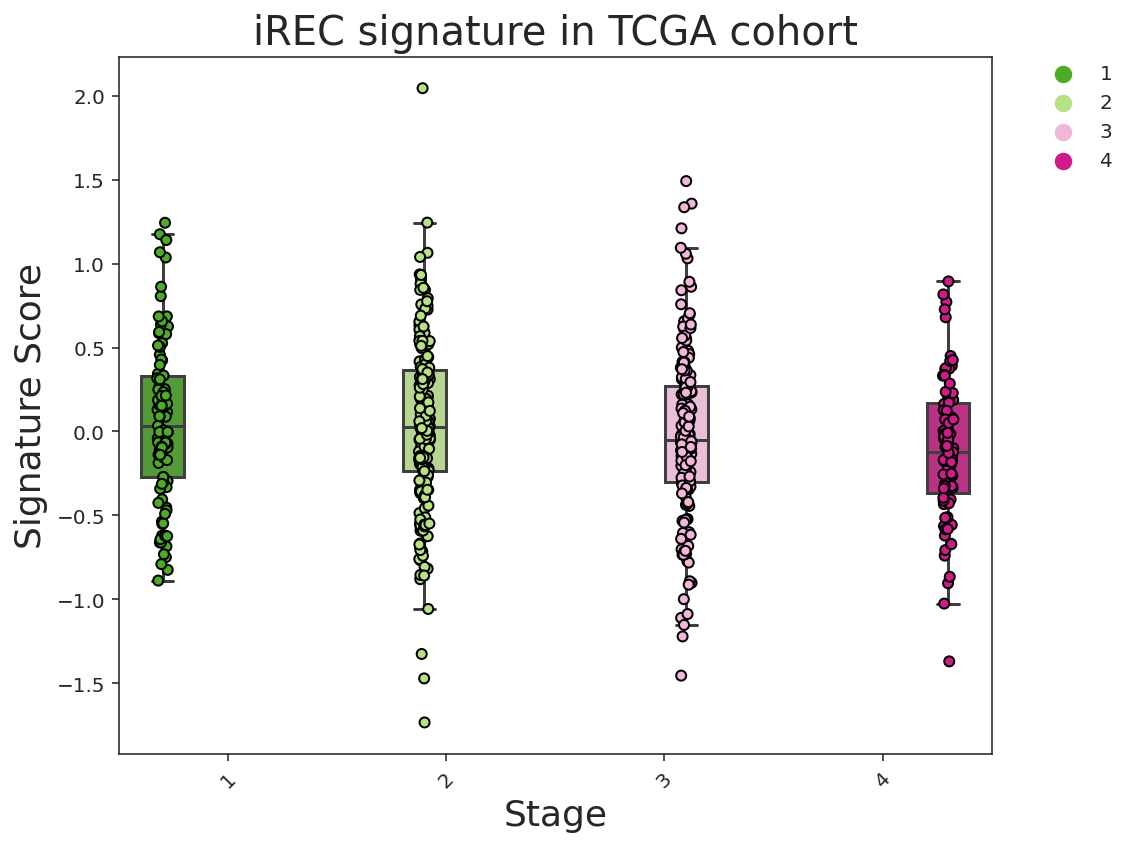

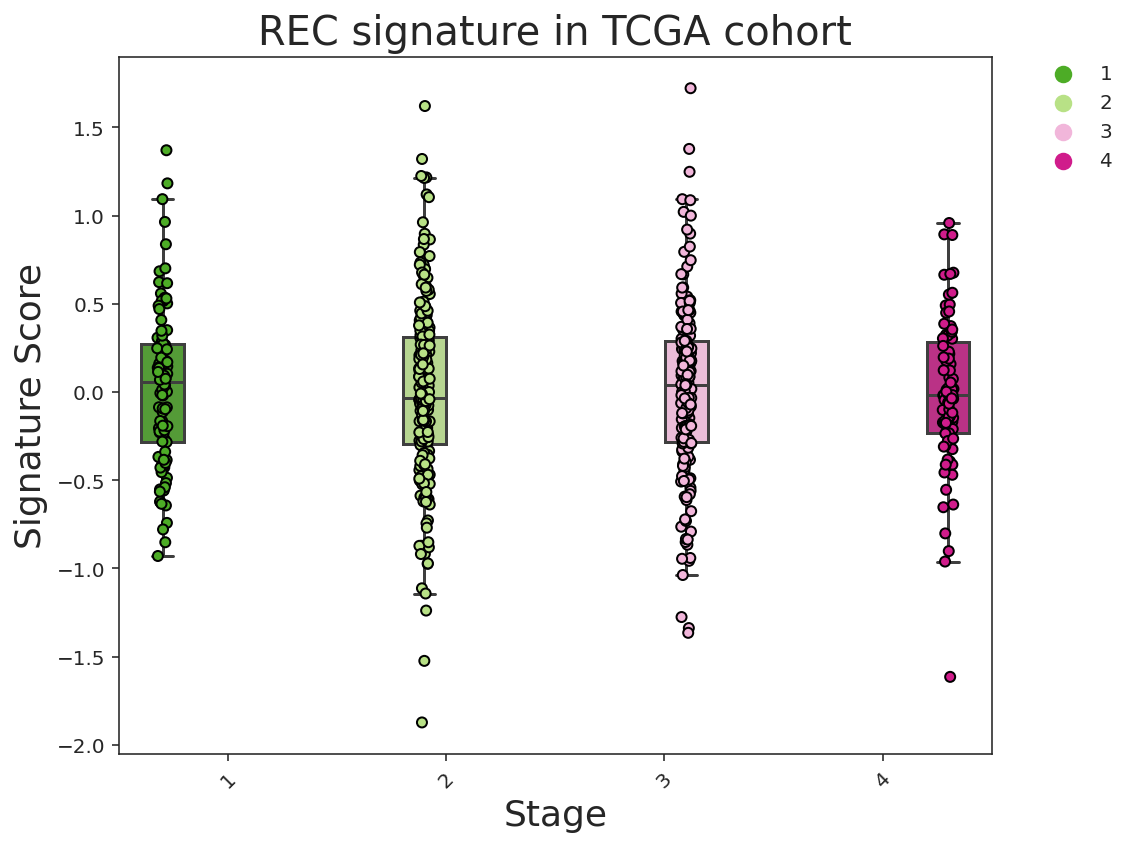

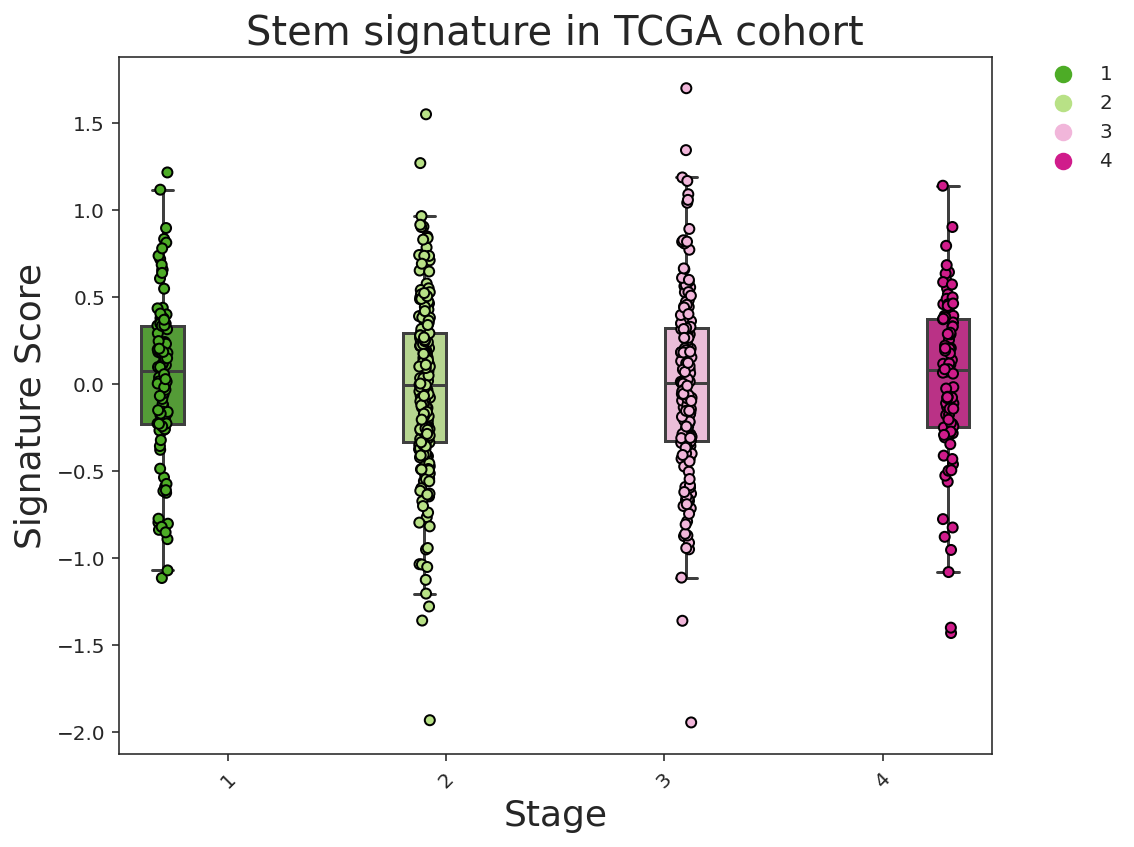

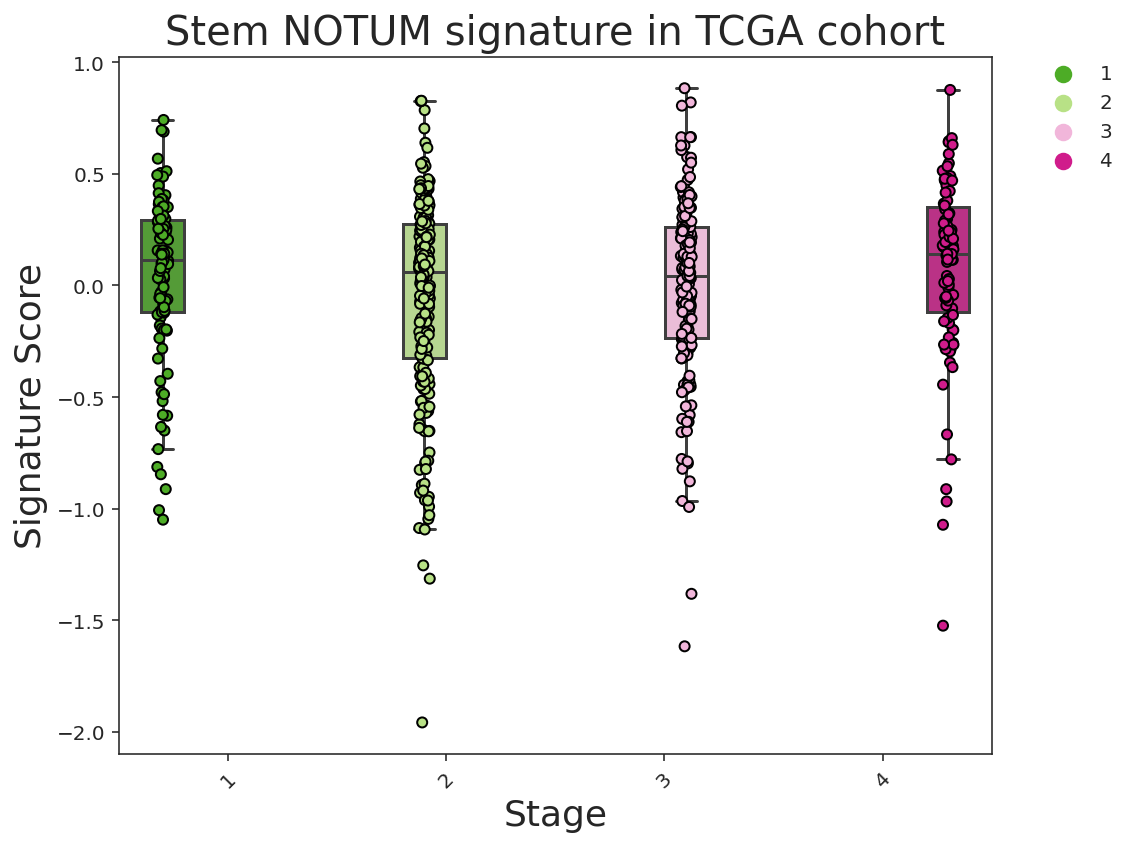

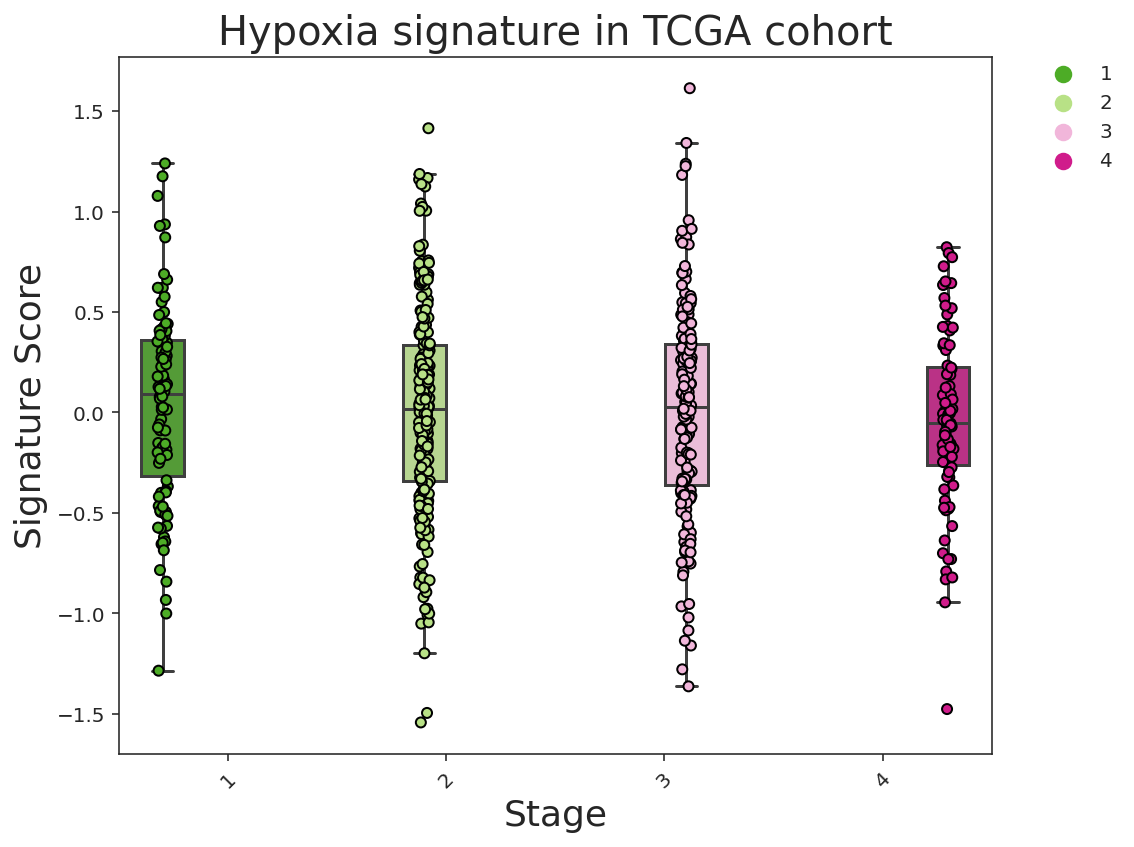

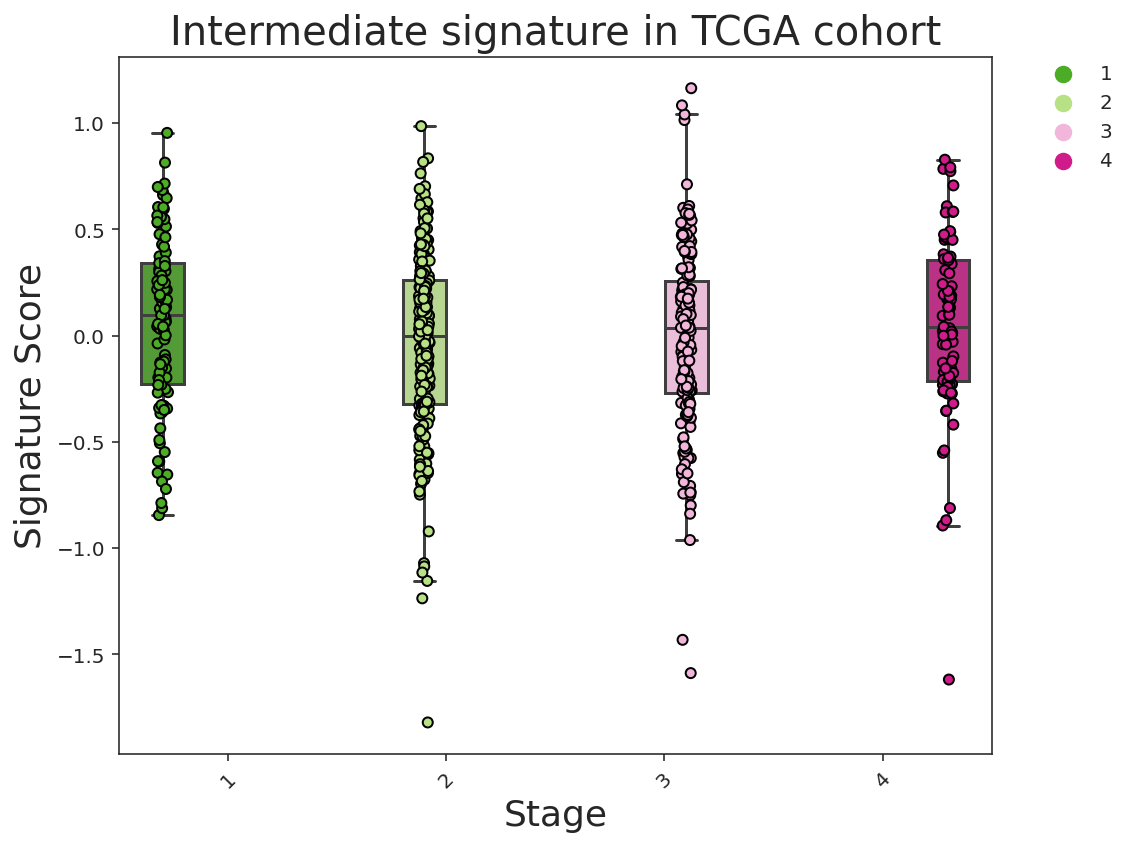

In [19]:
# Color palette
color_palette = ['#4dac26', '#b8e186', '#f1b6da', '#d01c8b'] #['#91CF60', '#937F8C', '#67A9CF', '#FB8072']

# Categories to plot
categories = ['iREC', 'REC', 'Stem', 'Stem NOTUM', 'Hypoxia', 'Intermediate']

# Iterate through each category
for category in categories:
    # Filter data for the current category
    df2plot = combined_df[combined_df['Category'] == category].copy()
    
    # Create the plot
    with sns.axes_style('ticks'):
        plt.figure(figsize=(8, 6))  # Adjust figure size if needed
        
        # Boxplot
        sns.boxplot(
            data=df2plot, x='Stage', y='Signature_score', hue='Stage',
            palette=color_palette, fliersize=0
        )
        
        # Stripplot
        sns.stripplot(
            data=df2plot, x='Stage', y='Signature_score', hue='Stage',
            palette=color_palette, dodge=True, edgecolor="black", linewidth=1
        )
        
        # Adjust legend to avoid overlapping
        handles, labels = plt.gca().get_legend_handles_labels()
        plt.legend(
            handles[len(set(df2plot['Stage'])):],  # Strip duplicate handles
            labels[len(set(df2plot['Stage'])):],  # Strip duplicate labels
            bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, frameon=False
        )
        
        # Add titles and labels
        plt.title(f'{category} signature in TCGA cohort', fontsize=20)
        plt.xlabel('Stage', fontsize=18)
        plt.ylabel('Signature Score', fontsize=18)
        plt.xticks(rotation=45)
        
        # Show or save the plot
        plt.tight_layout()
        #plt.show()
        plt.savefig(os.path.join(FIG2SAVE,f'TCGA_staging_{category}_signature.pdf'), bbox_inches="tight", dpi=300)


In [20]:
FIG2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/final_object/20mt/figures')